## Examen 3er Corte
## Matematicas Avanzadas para la Ciencias de datos

Alumno : Garcia de Arcos Jose Angel Eduardo <br> Grupo : 5AM1

Instrucciones para la resolucion del Examen.


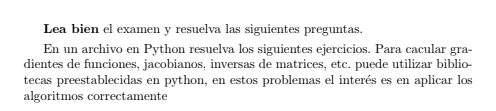

### Problema N°1

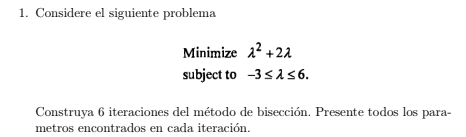

#### CODE

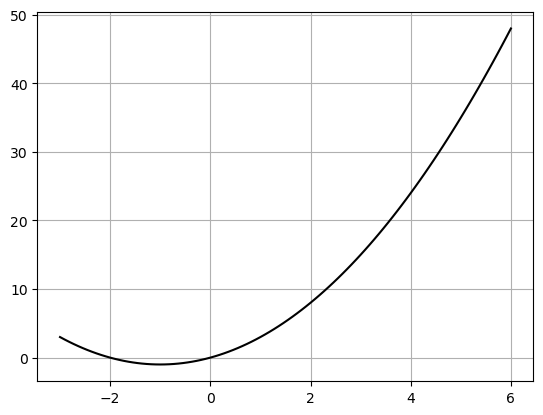

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

a = -3
b = 6
T = np.linspace(a, b, 100)
U = (T**2) + (2*T)
plt.figure()
plt.plot(T, U, 'k')
plt.grid()
plt.show()

In [9]:
import sympy

def CalcularGradiante():
    T= sympy.Symbol('T')
    fU = (T**2) + (2*T)
    d1fU = sympy.diff(fU)
    print(fU)
    print(d1fU)
    return None

CalcularGradiante()

T**2 + 2*T
2*T + 2


In [10]:
def U(T):
    return T**2 + 2*T
print(U(2))
def d1U(T):
    return 2*T + 2
print(d1U(2))

8
6


In [11]:
def biseccion():
    a =6
    b =-3
    k = 0
    epsilon = 0.1
    
    cont = 0
    registro = []
    
    while(True):
        alpha = (a+b)/2
        
        # Primera derivada en a
        dU_a = d1U(a)
        
        #Primera derivada en alpha
        dU_alpha = d1U(alpha)
        
        if(dU_a*dU_alpha < 0):
            b = alpha
        else:
            a = alpha
            
        Ua = U(a)    
        
        # Condicion de finalizacion
        if(np.abs(a-b) < epsilon):
            print('-------------------------------------------------------------')
            break
            
        cont = cont + 1
        registro.append([cont, a, Ua])
        print("It: {:02} - lambda: {:.10f} - {:.10f}".format(cont, a, Ua))
        
    return registro

        
reg1 = biseccion()

It: 01 - lambda: 1.5000000000 - 5.2500000000
It: 02 - lambda: -0.7500000000 - -0.9375000000
It: 03 - lambda: -0.7500000000 - -0.9375000000
It: 04 - lambda: -0.7500000000 - -0.9375000000
It: 05 - lambda: -0.7500000000 - -0.9375000000
It: 06 - lambda: -0.8906250000 - -0.9880371094
-------------------------------------------------------------


#### Ploteo del punto encontrado en la iteracion N°6 

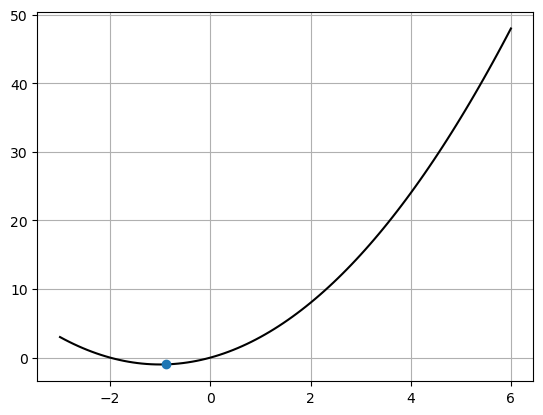

In [12]:
a = -3
b = 6
T = np.linspace(a, b, 100)
U = (T**2) + (2*T)
plt.figure()
plt.plot(T, U, 'k')
plt.grid()
plt.plot(-0.890625,-0.9880371,marker ="o") #ploteo del punto iteracion 6
plt.show()


### Problema N°2

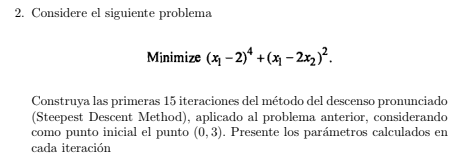

Iteracion :  0
[0, 3]
Iteracion :  1
[3.2 0.6]
Iteracion :  2
[2.5088 1.4   ]
Iteracion :  3
[2.45611326 1.28352   ]
Iteracion :  4
[2.41815747 1.23914931]
Iteracion :  5
[2.38891059 1.21509285]
Iteracion :  6
[2.36538127 1.1985828 ]
Iteracion :  7
[2.3458694  1.18586907]
Iteracion :  8
[2.32931946 1.17552158]
Iteracion :  9
[2.31503341 1.1668321 ]
Iteracion :  10
[2.30252708 1.15937979]
Iteracion :  11
[2.29145185 1.15288679]
Iteracion :  12
[2.281549  1.1471581]
Iteracion :  13
[2.27262166 1.14205122]
Iteracion :  14
[2.26451688 1.13745891]


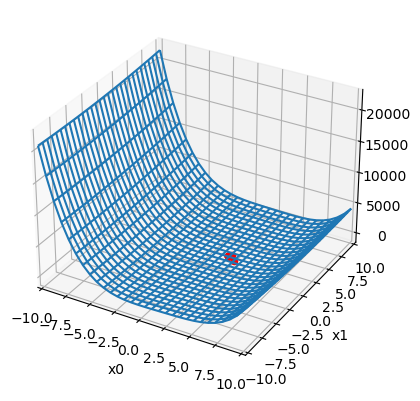

In [13]:
import matplotlib.pyplot as plt
import time

def f(x):
    y= (x[0]-2)**4+(x[0]-2*x[1])**2 #funcion a introducir
    return y



plt.ion()
fig=plt.figure()
ax=plt.axes(projection='3d')
x0=np.linspace(-10,10,30)
x1=np.linspace(-10,10,30)
X0,X1 = np.meshgrid(x0,x1)
x= np.stack((X0,X1))

ax.set_xlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')

ax.plot_wireframe(X0,X1,f(x),rstride=1,cstride=1)

x=[0,3]  #Punto inicial
h=.1


def gx0(x):
    y= (4*(x[0]-2)**3) #derivada parcial para x0
    return y
def gx1(x):
    y=8*x[1] - 4*x[0]   #derivada parcial para x1
    return y

for i in range(15):   #Numero de iteraciones a desarrollar
    print("Iteracion : ",i)
    print(x)
    x=x-h*np.array([gx0(x),gx1(x)])
    ax.scatter(x[0],x[1],f(x),facecolor='red')
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.2)


ax.scatter(x[0],x[1],f(x),facecolor='green')





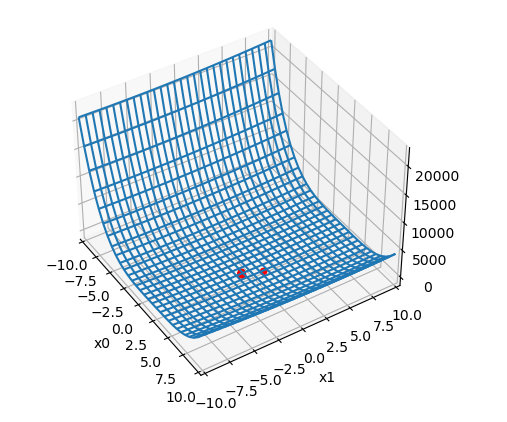

### Problema N°3

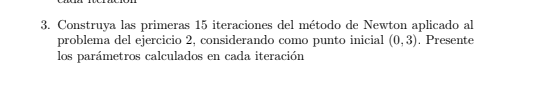

In [14]:
def grad(x):
    x1, x2 = x[0], x[1]
    return np.array([4*(x1-2)**3 + 2*(x1-2*x2), 2*(x1-2*x2)*(-2)])

def hessian(x):
    x1, x2 = x[0], x[1]
    return np.array([[12*(x1-2)**2 + 2, -4], [-4, 2]])

x_k = np.array([0, 3])

for i in range(15):
    print(f"Iteration {i+1}: x_k = {x_k}")
    grad_k = grad(x_k)
    hessian_k = hessian(x_k)
    x_k = x_k - np.linalg.inv(hessian_k).dot(grad_k)

Iteration 1: x_k = [0 3]
Iteration 2: x_k = [-0.0952381  -9.19047619]
Iteration 3: x_k = [ 3.04327953 33.65798763]
Iteration 4: x_k = [ -52.21348961 -205.40094211]
Iteration 5: x_k = [-34.0782382  548.04634995]
Iteration 6: x_k = [  -22.48183796 -1689.10272575]
Iteration 7: x_k = [ -11.51265399 5044.28286927]
Iteration 8: x_k = [   -34.72954476 -15202.30769734]
Iteration 9: x_k = [-1.12217026e+01  4.55844797e+04]
Iteration 10: x_k = [   -268.34273625 -137290.12453275]
Iteration 11: x_k = [-1.76351203e+02  4.11517671e+05]
Iteration 12: x_k = [-1.29839927e+02 -1.23481269e+06]
Iteration 13: x_k = [-1.48530210e+01  3.70440837e+06]
Iteration 14: x_k = [   -13074.82719991 -11139374.77715287]
Iteration 15: x_k = [-8.71581968e+03  3.34006927e+07]
